## Logistic Regression

Data: The titanic dataset
We will try to run the logistic regression on this data and see how the logistic regression performs
(evaluate the model performance).

In [1]:
#Import the required libraries

import pandas as pd
from sklearn.model_selection import train_test_split #to split the data into training and testing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
url = 'http://bit.ly/wkspdata'

df = pd.read_csv(url) #converting into dataframe

df.head() #looking at the top 5 records

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   name      891 non-null    object 
 3   sex       891 non-null    object 
 4   age       714 non-null    float64
 5   sibsp     891 non-null    int64  
 6   parch     891 non-null    int64  
 7   ticket    891 non-null    object 
 8   fare      891 non-null    float64
 9   cabin     204 non-null    object 
 10  embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
def preprocess (df):
    features_to_drop = ["name", "cabin", "ticket"]
    df = df.drop(features_to_drop, axis=1) #to drop the columns
    df = df.dropna()
    
    categorical_features= ["pclass", "sex","embarked"]
    df= pd.get_dummies(df, columns = categorical_features)
    
    return df

In [5]:
df = preprocess(df)

df.head()

,survived,age,sibsp,parch,fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    712 non-null    int64  
 1   age         712 non-null    float64
 2   sibsp       712 non-null    int64  
 3   parch       712 non-null    int64  
 4   fare        712 non-null    float64
 5   pclass_1    712 non-null    uint8  
 6   pclass_2    712 non-null    uint8  
 7   pclass_3    712 non-null    uint8  
 8   sex_female  712 non-null    uint8  
 9   sex_male    712 non-null    uint8  
 10  embarked_C  712 non-null    uint8  
 11  embarked_Q  712 non-null    uint8  
 12  embarked_S  712 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 38.9 KB


In [7]:
#Split the data into X and y

X = df.iloc[:, 1:13].values
y = df.iloc[:,0].values

In [9]:
#Split the data into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#create an instance of the logistic regression
log_reg = LogisticRegression(max_iter=1000)

log_reg.fit(X_train, y_train) #training the model

LogisticRegression(max_iter=1000)

In [10]:
#predicting on the test data and evaluate the model performance

pred_test = log_reg.predict(X_test) #predicted

In [11]:
acc = metrics.accuracy_score(y_test, pred_test) #actual vs predicted

In [12]:
print('The accuracy is', acc)

The accuracy is 0.7902097902097902


<AxesSubplot:>

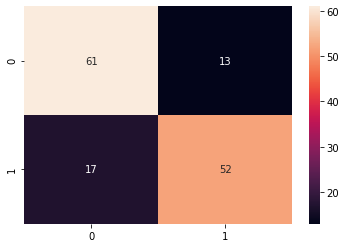

In [13]:
#import seaborn

import seaborn as sns
conf_mat = metrics.confusion_matrix(y_test, pred_test)
sns.heatmap(conf_mat, annot = True)